In [1]:
from skimage import measure
#ssim = measure.compare_ssim(A,A)
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import ImageChops
import math, operator


In [2]:
def rmsdiff(imageA, imageB):
    return np.sqrt(np.mean((imageA-imageB)**2))

In [3]:
def mse(imageA, imageB):

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    err = math.sqrt(err)

    return err

In [4]:
def compare(data):
    rmse = np.zeros(batch_size)
    ssim = np.zeros(batch_size)
    
    for i in range(batch_size):
                
        imgA = data[i,:,:,:]
        imgA = np.moveaxis(imgA,0,-1)
        #imgB= data[i+128,:,:,:]
        imgB= data[i+batch_size,:,:,:]
        imgB = np.moveaxis(imgB,0,-1)
        
        rmse[i] = mse(imgA,imgB)
        ssim[i] = measure.compare_ssim(imgA,imgB,multichannel=True)
        
    r = np.average(rmse)
    s = np.average(ssim)
    return r,s

In [5]:
# resnet 0-87
num = 87
batch_size = 64

RMSE = np.zeros(num)
SSIM = np.zeros(num)

for i in range(num):
    
    # Open file
    filename = 'log_resnet/imagedata_experiment1_'+ str(i+1) + '.txt'    #'log/imagedata_experiment1_1.txt' #'log/test.txt'
    f = open(filename)
    raw_data = f.readlines()
    f.close()

    # Load data
    data = raw_data[-1]
    data = list(map(float, data.split()))
    data = np.array(data)
    #data = data.reshape((256,3,64,64)) #first 128 images are fake and last 128 images are correspoonding real image
    data = data.reshape((batch_size*2,3,64,64)) #first 64 images are fake and last 64 images are correspoonding real image
    
    RMSE[i],SSIM[i] = compare(data)

In [6]:
# resnet 88-97
batch_size = 64

exRMSE = np.zeros(97)
exSSIM = np.zeros(97)

for i in range(86, 97):
    # Open file
    filename = 'log_resnet/imagedata_experiment2_'+ str(i+1) + '.txt'    #'log/imagedata_experiment1_1.txt' #'log/test.txt'
    f = open(filename)
    raw_data = f.readlines()
    f.close()

    # Load data
    exdata = raw_data[-1]
    exdata = list(map(float, exdata.split()))
    exdata = np.array(exdata)
    #data = data.reshape((256,3,64,64)) #first 128 images are fake and last 128 images are correspoonding real image
    exdata = exdata.reshape((batch_size*2,3,64,64)) #first 64 images are fake and last 64 images are correspoonding real image
    
    exRMSE[i],exSSIM[i] = compare(exdata)

In [7]:
for i in range(87):
    exRMSE[i] = RMSE[i]
    exSSIM[i] = SSIM[i]

In [8]:
# sgd
num = 31
batch_size = 128

sgdRMSE = np.zeros(num)
sgdSSIM = np.zeros(num)

for i in range(num):
    
    # Open file
    filename = 'log_sgd/imagedata_experiment1_'+ str(i+1) + '.txt'    #'log/imagedata_experiment1_1.txt' #'log/test.txt'
    f = open(filename)
    raw_data = f.readlines()
    f.close()

    # Load data
    data = raw_data[-1]
    data = list(map(float, data.split()))
    data = np.array(data)
    #data = data.reshape((256,3,64,64)) #first 128 images are fake and last 128 images are correspoonding real image
    data = data.reshape((batch_size*2,3,64,64)) #first 64 images are fake and last 64 images are correspoonding real image
    
    sgdRMSE[i],sgdSSIM[i] = compare(data)

In [9]:
# adam
dcnum = 30
dcbatch_size = 128
dcRMSE = np.zeros(dcnum)
dcSSIM = np.zeros(dcnum)

for i in range(dcnum):
    
    # Open file
    filename = 'log_adam/imagedata_experiment1_'+ str(i+1) + '.txt'    #'log/imagedata_experiment1_1.txt' #'log/test.txt'
    f = open(filename)
    raw_data = f.readlines()
    f.close()

    # Load data
    dcdata = raw_data[-1]
    dcdata = list(map(float, dcdata.split()))
    dcdata = np.array(dcdata)
    #data = data.reshape((256,3,64,64)) #first 128 images are fake and last 128 images are correspoonding real image
    dcdata = dcdata.reshape((dcbatch_size*2,3,64,64)) #first 64 images are fake and last 64 images are correspoonding real image
    
    dcRMSE[i],dcSSIM[i] = compare(dcdata)

In [10]:
# adam - filter = 64
addnum = 30
addbatch_size = 128
addRMSE = np.zeros(addnum)
addSSIM = np.zeros(addnum)

for i in range(addnum):
    
    # Open file
    filename = 'log/imagedata_experiment1_'+ str(i+1) + '.txt'    #'log/imagedata_experiment1_1.txt' #'log/test.txt'
    f = open(filename)
    raw_data = f.readlines()
    f.close()

    # Load data
    dcdata = raw_data[-1]
    dcdata = list(map(float, dcdata.split()))
    dcdata = np.array(dcdata)
    #data = data.reshape((256,3,64,64)) #first 128 images are fake and last 128 images are correspoonding real image
    dcdata = dcdata.reshape((addbatch_size*2,3,64,64)) #first 64 images are fake and last 64 images are correspoonding real image
    
    addRMSE[i],addSSIM[i] = compare(dcdata)

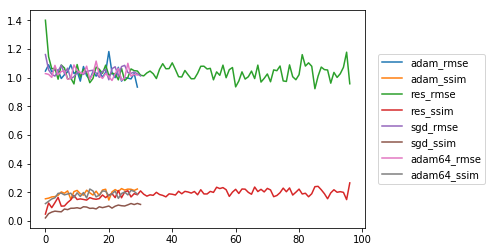

In [11]:
plt.figure()
#plt.plot(RMSE, label = 'residual_rmse')
#plt.plot(SSIM, label = 'residual_ssim')
plt.plot(dcRMSE, label = 'adam_rmse')
plt.plot(dcSSIM, label = 'adam_ssim')
plt.plot(exRMSE, label = 'res_rmse')
plt.plot(exSSIM, label = 'res_ssim')
plt.plot(sgdRMSE, label = 'sgd_rmse')
plt.plot(sgdSSIM, label = 'sgd_ssim')
plt.plot(addRMSE, label = 'adam64_rmse')
plt.plot(addSSIM, label = 'adam64_ssim')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

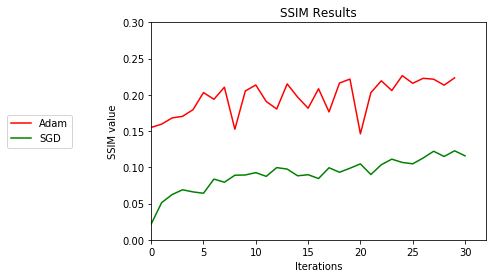

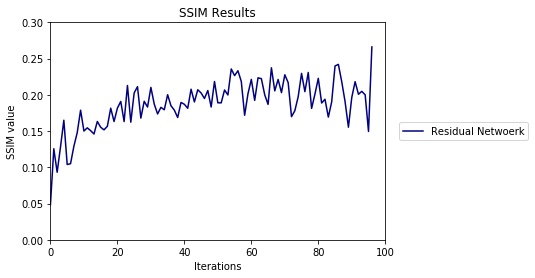

In [22]:
plt.figure()
#plt.plot(SSIM, label = 'residual_ssim')
plt.xlabel("Iterations")
plt.ylabel("SSIM value")
plt.title("SSIM Results")
plt.plot(dcSSIM, label = 'Adam', color = 'r')
plt.plot(sgdSSIM, label = 'SGD', color = 'g')
#plt.plot(addSSIM, label = 'adam64_ssim')
plt.axis([0, 32, 0, 0.3])
plt.legend(bbox_to_anchor=(-0.43,0.5), loc="center left", borderaxespad=0)
plt.figure()
plt.xlabel("Iterations")
plt.ylabel("SSIM value")
plt.title("SSIM Results")
plt.plot(exSSIM, label = 'Residual Netwoerk', color = 'navy')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.axis([0, 100, 0, 0.3])
plt.show()

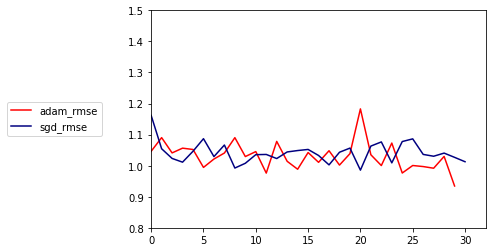

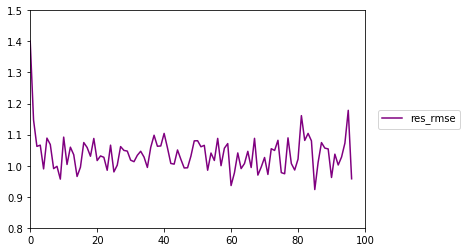

In [21]:
plt.figure()
#plt.plot(RMSE, label = 'residual_rmse')
plt.plot(dcRMSE, label = 'adam_rmse', color = 'r')
plt.plot(sgdRMSE, label = 'sgd_rmse', color = 'navy')
#plt.plot(addRMSE, label = 'adam64_rmse')
plt.axis([0, 32, 0.8, 1.5])
plt.legend(bbox_to_anchor=(-0.43,0.5), loc="center left", borderaxespad=0)
plt.figure()
plt.plot(exRMSE, label = 'res_rmse', color = 'purple')
plt.axis([0, 100, 0.8, 1.5])
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

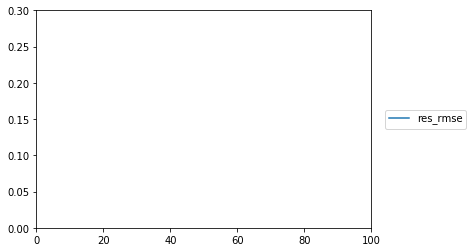

In [14]:
plt.figure()
plt.plot(exRMSE, label = 'res_rmse')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.axis([0, 100, 0, 0.3])
plt.show()

In [15]:
print(list(enumerate(exSSIM)))


[(0, 0.04857209229522598), (1, 0.12562508180589604), (2, 0.09321746924090314), (3, 0.12801370547989088), (4, 0.16495115151528833), (5, 0.10385330597522945), (6, 0.10501627759508522), (7, 0.129043100036179), (8, 0.14793147735559428), (9, 0.1788217887691411), (10, 0.15008353623925313), (11, 0.1544569512671517), (12, 0.1506219787910536), (13, 0.14595488746074625), (14, 0.16328636865160914), (15, 0.15529329263717762), (16, 0.15168142094499998), (17, 0.15664384743589133), (18, 0.18159929824458823), (19, 0.16321026318724186), (20, 0.18166353108663147), (21, 0.1909071178877157), (22, 0.1631327400743705), (23, 0.21289860221471765), (24, 0.16223891111412408), (25, 0.2025746843092386), (26, 0.21129161440580946), (27, 0.16791439612223968), (28, 0.19108085581978063), (29, 0.18318118691009727), (30, 0.21027073525273407), (31, 0.18728326135205597), (32, 0.1736374986382243), (33, 0.18274541548260065), (34, 0.1794116270535545), (35, 0.2001888415401325), (36, 0.18491979782003193), (37, 0.17890962122360

In [16]:
print(list(enumerate(exRMSE)))

[(0, 1.4010887297252705), (1, 1.1471377718974307), (2, 1.0621307730539629), (3, 1.0660445368055527), (4, 0.989630039640391), (5, 1.0887320666592952), (6, 1.0680907065965988), (7, 0.9905111750406366), (8, 0.9978860156324368), (9, 0.956722114886674), (10, 1.0919430265156542), (11, 1.0038843534473403), (12, 1.0595792776223336), (13, 1.035329348812079), (14, 0.9652686362031591), (15, 0.9948307655632411), (16, 1.0744409382616626), (17, 1.0585580854783327), (18, 1.0303450726522723), (19, 1.0876518695367037), (20, 1.0164729957137295), (21, 1.0313263662613155), (22, 1.0270029432415968), (23, 0.9852035073282462), (24, 1.0660595904729133), (25, 0.9799109081196244), (26, 1.0016874546367731), (27, 1.0614354125761571), (28, 1.0491055867656358), (29, 1.0469673692111925), (30, 1.0177460642557143), (31, 1.0128765229985714), (32, 1.0334382600668364), (33, 1.0463582737083557), (34, 1.0277314639814703), (35, 0.9943178863251416), (36, 1.0588616869148155), (37, 1.0979896799136024), (38, 1.0625448817693832)